<a href="https://colab.research.google.com/github/Guiils/analise_de_dados/blob/main/analise_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise Prática Loja de Varejo**



#Informações da base de dados - Loja de Varejo



1.   O que vamos analisar?

  Perfil dos clientes de uma loja de varejo

2.   Por que essa análise é importante?

  Porque podermos direcionar chamadas de marketing para o público alvo e aumentar as vendas

3.   Para quem é feita a análise?

  Para a área de marketing da loja

4.   Qual localização do banco de dados?

  Os dados foram obtidos de clientes em uma loja de varejo no Estados Unidos

Fonte: https://www.kaggle.com/datasets/datascientistanna/customers-dataset


#Dicionário de dados

*  Customer ID: ID do cliente
*  Gender: Gênero
*  Age: Idade
*  Annual Income: Salário Anual
*  Spending Score: Pontuação atribuída pela loja, com base no comportamento do cliente e na natureza do gasto (0 - 100)
*  Profession: Profissão
*  Work Experience: Experiência Profissional em anos
*  Family Size: Tamanho da familia

# Importando Bibliotecas

In [ ]:
pip install gcsfs

In [ ]:
pip install pandera

In [ ]:
from google.cloud import storage
import os
import numpy as np
import pandas as pd
import pandera as pa
import seaborn as sns
import matplotlib.pyplot as plt

#Conexão com GCP

In [ ]:
serviceAccount = '/content/southern-matter-389715-1ea76232649a.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage
client = storage.Client()
bucket = client.get_bucket('analise-shop')
bucket.blob('analise-shop')
path = 'gs://analise-shop/brutos/Customers.csv'

#EXTRAÇÃO

In [ ]:
df = pd.read_csv(path, sep= ',')

#Pré-Análise

In [ ]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


Aqui podemos observar que existe idade que é 0 o que é uma inconsistência. Mais a frente iremos checar a quantidade de valores 0 e com isso poderemos decidir se iremos tratar ou excluir esses dados.

In [ ]:
#Checando valores vazios de cada coluna
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [ ]:
#Checando se há alguma linha duplicada
df.duplicated().sum()

0

In [ ]:
pd.set_option('display.max_columns', 10)

#TRATAMENTO

##Tradução do df (colunas e informações das linhas)

In [ ]:
colunas = df.columns
print(colunas)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')


In [ ]:
#Traduzindo as colunas
df.rename(columns={'CustomerID':'clienteID',
                   'Gender':'genero',
                   'Age':'idade',
                   'Annual Income ($)':'salario_anual',
                   'Spending Score (1-100)':'pontuacao',
                   'Profession':'profissao',
                   'Work Experience':'exp_profissional',
                   'Family Size':'tam_familia'
    }, inplace=True)

In [ ]:
df

,clienteID,genero,idade,salario_anual,pontuacao,profissao,exp_profissional,tam_familia
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [ ]:
'''
Checagem de valores únicos de cada coluna com texto através de um for para retornar
todos de uma vez com intuito de fazer as traduções
'''
col_txt = ['genero', 'profissao']

for coluna in col_txt:
  valor = df[coluna].unique()
  print(f"{coluna} : {valor}")
  print()

genero : ['Male' 'Female']

profissao : ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]



In [ ]:
df_backup = df.copy()

In [ ]:
df['genero'] = (df['genero'].replace('Male', 'Masculino')
                            .replace('Female','Feminino'))

In [ ]:
df['profissao'] = (df['profissao'].replace('Healthcare', 'Profissional de Saúde')
                                  .replace('Engineer', 'Engenheiro')
                                  .replace('Lawyer', 'Advogado')
                                  .replace('Entertainment', 'Profissional de Entretenimento')
                                  .replace('Artist', 'Artista')
                                  .replace('Executive', 'Executivo')
                                  .replace('Doctor', 'Médico')
                                  .replace('Homemaker', 'Responsável Doméstico'))

##Alterando tipo da coluna

In [ ]:
# Realizando a mudança da coluna monetária de salário que está como Integer para Float
df['salario_anual'] = df['salario_anual'].astype(float)

# Realizando a mudança da coluna clienteID de Integer para String pois não será utilizada para nenhum cálculo
df['clienteID'] = df['clienteID'].astype(str)

## Checagem de nulos

In [ ]:
df.isnull().sum()

clienteID            0
genero               0
idade                0
salario_anual        0
pontuacao            0
profissao           35
exp_profissional     0
tam_familia          0
dtype: int64

In [ ]:
total_linhas = df['clienteID'].count()
total_linhas

2000

In [ ]:
porcentagem = (df['profissao'].isnull().sum()/total_linhas)*100
print(f'Existem {porcentagem:.2f}% de dados nulos')

Existem 1.75% de dados nulos


Pela porcentagem ser baixa podemos retirar essas linhas com informações nulas, mas como a coluna profissão não será o foco da análise, irei apenas substituir por 'desconhecido'.

In [ ]:
# Realizando a substituição utilizando fillna na coluna de 'profissão'
df['profissao'] = df['profissao'].fillna('Desconhecido')

In [ ]:
df.isnull().sum()

clienteID           0
genero              0
idade               0
salario_anual       0
pontuacao           0
profissao           0
exp_profissional    0
tam_familia         0
dtype: int64

##Checando e trantando inconsistencias

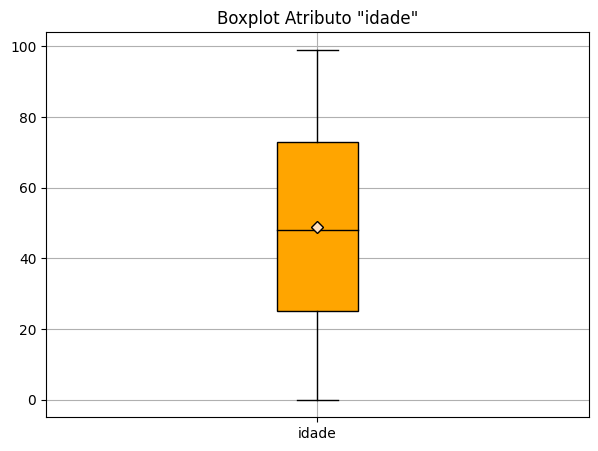

In [ ]:
# Criando um boxplot para checar os valores
plt.figure(figsize=(7, 5))
df.boxplot(column='idade',
           patch_artist=True,
           boxprops=dict(facecolor='orange', color='black'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           showmeans=True,
           meanprops=dict(marker='D', markeredgecolor='black', markerfacecolor='#ffe0be'))
plt.title('Boxplot Atributo "idade"')
plt.show()

A partir dessa plotagem podemos observar que a maioria dos clientes tem entre 20 e 80 anos em caso de substituição poderemos usar a média sem problemas pois não temos outliers

In [ ]:
#Checando quantos clientes foram cadastrados com 0 de idade
idade_incon = df['idade'][df['idade'] == 0].count()
idade_incon

24

In [ ]:
porcentagem = (idade_incon/total_linhas)*100
print(f'Existem {porcentagem:.2f}% de dados  = 0')

Existem 1.20% de dados  = 0


Apenas 1.20% são igual a 0 na coluna idade então irei fazer a substituição pela média de idade do data frame

In [ ]:
# Fazendo a substitução dos valores 0 pela media de idade
media = df['idade'].mean()
df['idade'] = df['idade'].replace(0, round(media))

In [ ]:
df_analise = df[(df['idade'] >= 18) & (df['idade'] <= 80)]
df_analise

,clienteID,genero,idade,salario_anual,pontuacao,profissao,exp_profissional,tam_familia
0,1,Masculino,19,15000.0,39,Profissional de Saúde,1,4
1,2,Masculino,21,35000.0,81,Engenheiro,3,3
2,3,Feminino,20,86000.0,6,Engenheiro,1,1
3,4,Feminino,23,59000.0,77,Advogado,0,2
4,5,Feminino,31,38000.0,40,Profissional de Entretenimento,2,6
...,...,...,...,...,...,...,...,...
1990,1991,Feminino,30,166983.0,69,Artista,7,3
1993,1994,Feminino,64,175254.0,100,Artista,9,5
1994,1995,Feminino,19,54121.0,89,Engenheiro,6,3
1995,1996,Feminino,71,184387.0,40,Artista,8,7


In [ ]:
df_analise.describe()

,idade,salario_anual,pontuacao,exp_profissional,tam_familia
count,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000
mean,47.571754,106596.900532,50.416097,4.037206,3.709947
std,17.935092,47251.211314,27.628203,3.898131,1.952553
min,18.000000,0.000000,1.000000,0.000000,1.000000
25%,32.000000,70280.000000,28.000000,1.000000,2.000000
50%,48.000000,102904.000000,49.000000,3.000000,4.000000
75%,63.000000,146308.000000,74.000000,7.000000,5.000000
max,80.000000,189945.000000,100.000000,17.000000,9.000000


De acordo com a lei dos Estados Unidos entre 14 e 15 anos: certos trabalhos são permitidos em alguns estabelecimentos tais como: escritórios, supermercados, mercearias, lojas, restaurantes, cinema, e parques de diversão.\
Com base nisso irei checar se há alguma inconsistencia nesse sentido, excluindo profissões de Responsável Doméstico(Que são tarefas que as vezes crianças também fazem), Artista e Profissional de Entretenimento(Pois existem artistas e dançarinos mirins)

In [ ]:
# Checando se há algo que se enquadra em incosistencia para retirar do df
df_analise.loc[(df_analise['exp_profissional'] > (df_analise['idade']-14)) &
 (~df_analise['profissao'].isin(['Artista','Responsável Doméstico','Profissional de Entretenimento']))]

,clienteID,genero,idade,salario_anual,pontuacao,profissao,exp_profissional,tam_familia
115,116,Feminino,19,51000.0,50,Executivo,8,4
138,139,Masculino,19,22000.0,10,Marketing,8,4
353,354,Masculino,23,181760.0,35,Profissional de Saúde,14,3
357,358,Masculino,20,184324.0,51,Marketing,13,5
388,389,Feminino,26,117454.0,8,Profissional de Saúde,16,2
389,390,Feminino,18,86203.0,23,Médico,13,1
407,408,Masculino,18,103896.0,36,Executivo,16,4
522,523,Masculino,20,119952.0,2,Profissional de Saúde,8,2
819,820,Feminino,19,117477.0,48,Profissional de Saúde,6,7
857,858,Masculino,21,155151.0,16,Marketing,14,3


In [ ]:
# Retirando as inconsistencias encontradas utilizando o metodo index para obter os indices das linhas que se enquadram no filtro
df_analise = df_analise.drop(df_analise[(df_analise['exp_profissional'] > (df_analise['idade']-14)) &
 (~df_analise['profissao'].isin(['Artista','Responsável Doméstico','Profissional de Entretenimento']))].index)

##Checando se está tudo correto depois das alterações

In [ ]:
# Verificação de medidas de tendencia central, dispersão e separatrizes
df_analise.describe()

,idade,salario_anual,pontuacao,exp_profissional,tam_familia
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,48.001542,106399.767926,50.524287,3.946800,3.716268
std,17.731363,47226.803525,27.622224,3.835077,1.957020
min,18.000000,0.000000,1.000000,0.000000,1.000000
25%,32.000000,70152.000000,28.000000,1.000000,2.000000
50%,48.000000,102413.000000,49.000000,3.000000,4.000000
75%,63.000000,146130.000000,74.000000,7.000000,5.000000
max,80.000000,189945.000000,100.000000,17.000000,9.000000


In [ ]:
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1998
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   clienteID         1297 non-null   object 
 1   genero            1297 non-null   object 
 2   idade             1297 non-null   int64  
 3   salario_anual     1297 non-null   float64
 4   pontuacao         1297 non-null   int64  
 5   profissao         1297 non-null   object 
 6   exp_profissional  1297 non-null   int64  
 7   tam_familia       1297 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 91.2+ KB


##Criando uma colunas

In [ ]:
# coluna com a classificação das pontuações dos clientes
df_analise['classificacao_pont'] = ''
df_analise.loc[df_analise['pontuacao'] < 50, 'classificacao_pont'] = 'baixo'
df_analise.loc[(df_analise['pontuacao'] >= 50) & (df_analise['pontuacao'] < 80), 'classificacao_pont'] = 'médio'
df_analise.loc[df_analise['pontuacao'] >= 80, 'classificacao_pont'] = 'alto'

In [ ]:
# coluna com a faixa etária dos clientes
df_analise['faixa_etaria'] = ''
df_analise.loc[df_analise['idade'] < 25, 'faixa_etaria'] = 'jovem'
df_analise.loc[(df_analise['idade'] >= 25) & (df_analise['idade'] < 60), 'faixa_etaria'] = 'adulto'
df_analise.loc[df_analise['idade'] >= 60, 'faixa_etaria'] = 'idoso'

In [ ]:
df_analise

,clienteID,genero,idade,salario_anual,pontuacao,profissao,exp_profissional,tam_familia,classificacao_pont,faixa_etaria
0,1,Masculino,19,15000.0,39,Profissional de Saúde,1,4,baixo,jovem
1,2,Masculino,21,35000.0,81,Engenheiro,3,3,alto,jovem
2,3,Feminino,20,86000.0,6,Engenheiro,1,1,baixo,jovem
3,4,Feminino,23,59000.0,77,Advogado,0,2,médio,jovem
4,5,Feminino,31,38000.0,40,Profissional de Entretenimento,2,6,baixo,adulto
...,...,...,...,...,...,...,...,...,...,...
1989,1990,Feminino,47,75293.0,55,Médico,6,7,médio,adulto
1990,1991,Feminino,30,166983.0,69,Artista,7,3,médio,adulto
1993,1994,Feminino,64,175254.0,100,Artista,9,5,alto,idoso
1995,1996,Feminino,71,184387.0,40,Artista,8,7,baixo,idoso


#Validação Schema

In [ ]:
schema = pa.DataFrameSchema(
    columns = {
        'clienteID':pa.Column(str),
        'genero':pa.Column(str, pa.Check.isin(['Masculino', 'Feminino'])),
        'idade':pa.Column(int, pa.Check.between(min_value=18, max_value=80)),
        'salario_anual':pa.Column(float),
        'pontuacao':pa.Column(int, pa.Check.between(min_value=0, max_value=100)),
        'profissao':pa.Column(str),
        'exp_profissional':pa.Column(int),
        'tam_familia':pa.Column(int),
        'classificacao_pont': pa.Column(str, pa.Check.isin(['baixo', 'médio', 'alto'])),
        'faixa_etaria': pa.Column(str, pa.Check.isin(['jovem', 'adulto', 'idoso']))
  }
)

In [ ]:
schema.validate(df_analise)

,clienteID,genero,idade,salario_anual,pontuacao,profissao,exp_profissional,tam_familia,classificacao_pont,faixa_etaria
0,1,Masculino,19,15000.0,39,Profissional de Saúde,1,4,baixo,jovem
1,2,Masculino,21,35000.0,81,Engenheiro,3,3,alto,jovem
2,3,Feminino,20,86000.0,6,Engenheiro,1,1,baixo,jovem
3,4,Feminino,23,59000.0,77,Advogado,0,2,médio,jovem
4,5,Feminino,31,38000.0,40,Profissional de Entretenimento,2,6,baixo,adulto
...,...,...,...,...,...,...,...,...,...,...
1989,1990,Feminino,47,75293.0,55,Médico,6,7,médio,adulto
1990,1991,Feminino,30,166983.0,69,Artista,7,3,médio,adulto
1993,1994,Feminino,64,175254.0,100,Artista,9,5,alto,idoso
1995,1996,Feminino,71,184387.0,40,Artista,8,7,baixo,idoso


#LOAD (CARREGAMENTO) GCP

In [ ]:
df_analise.to_csv('gs://analise-shop/tratados/Customers_tratado.csv', index = False)


#Análise Exploratória de dados

##Separando colunas

In [ ]:
# Criando uma lista com as colunas numéricas
listanum =['idade', 'salario_anual',	'pontuacao', 'exp_profissional', 'tam_familia']


##Correlações

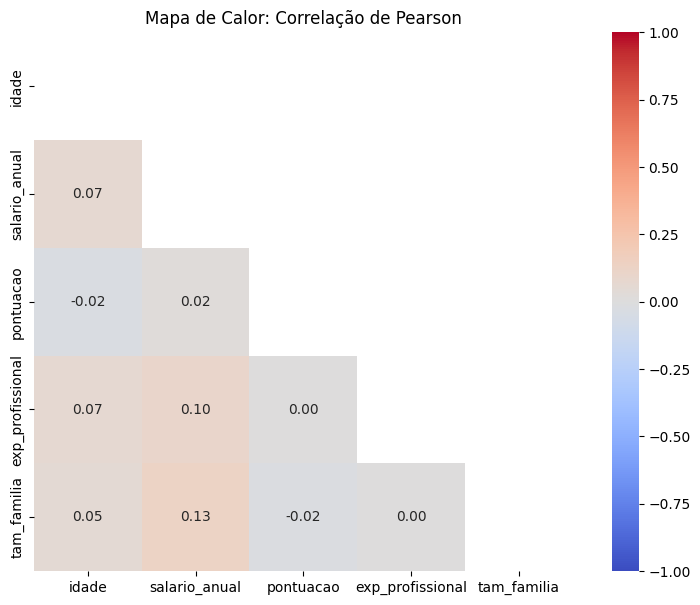

In [ ]:
# Matriz de correlação Preços
corrmat = df_analise[listanum].corr()
fig = plt.figure(figsize = (10, 7))
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, fmt=".2f", cmap='coolwarm', vmax = 1, vmin= -1, mask = mask, square = True, annot = True)
plt.title("Mapa de Calor: Correlação de Pearson")
plt.show()

No gráfico de correlação podemos observar que não existe nenhuma correlação entre as colunas pois todas estão bem próximas de 0.

##Plotagem de Gráficos

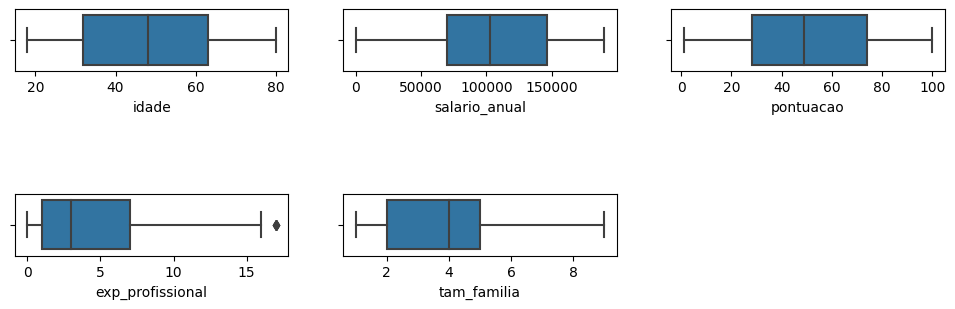

In [ ]:
#Analises de boxplot de cada coluna do df

plt.figure(figsize=(12, 8))

for i in range(5):
    plt.subplot(4, 3, i+1)
    plt.subplots_adjust(hspace=2)
    sns.boxplot(x=df_analise[listanum[i]])

plt.show()

In [ ]:
df_analise.describe()

,idade,salario_anual,pontuacao,exp_profissional,tam_familia
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,48.001542,106399.767926,50.524287,3.946800,3.716268
std,17.731363,47226.803525,27.622224,3.835077,1.957020
min,18.000000,0.000000,1.000000,0.000000,1.000000
25%,32.000000,70152.000000,28.000000,1.000000,2.000000
50%,48.000000,102413.000000,49.000000,3.000000,4.000000
75%,63.000000,146130.000000,74.000000,7.000000,5.000000
max,80.000000,189945.000000,100.000000,17.000000,9.000000


Nessas análises podemos perceber que:

*   A média de idade dos clientes que frequentam é de 50 anos
*   A maioria recebe um salário anual entre USD 70152,00 e USD 146130,00
*   A pontuação média dos clientes é 50
*   A maioria dos clientes  tem de 1 a 7 anos de experiência de profissão
*   A maioria dos clientes tem entre 2 e 5 membros em sua familia




In [ ]:
df_analise.groupby(['genero', 'idade']).size().sort_values(ascending=False)


genero     idade
Feminino   49       30
           31       24
           52       21
           30       20
           54       19
                    ..
           42        4
Masculino  57        4
           50        4
           71        4
           51        1
Length: 126, dtype: int64

<Axes: title={'center': 'PONTUAÇÃO POR GENERO'}, xlabel='GENERO E PONTUAÇÃO', ylabel='QUANTIDADE'>

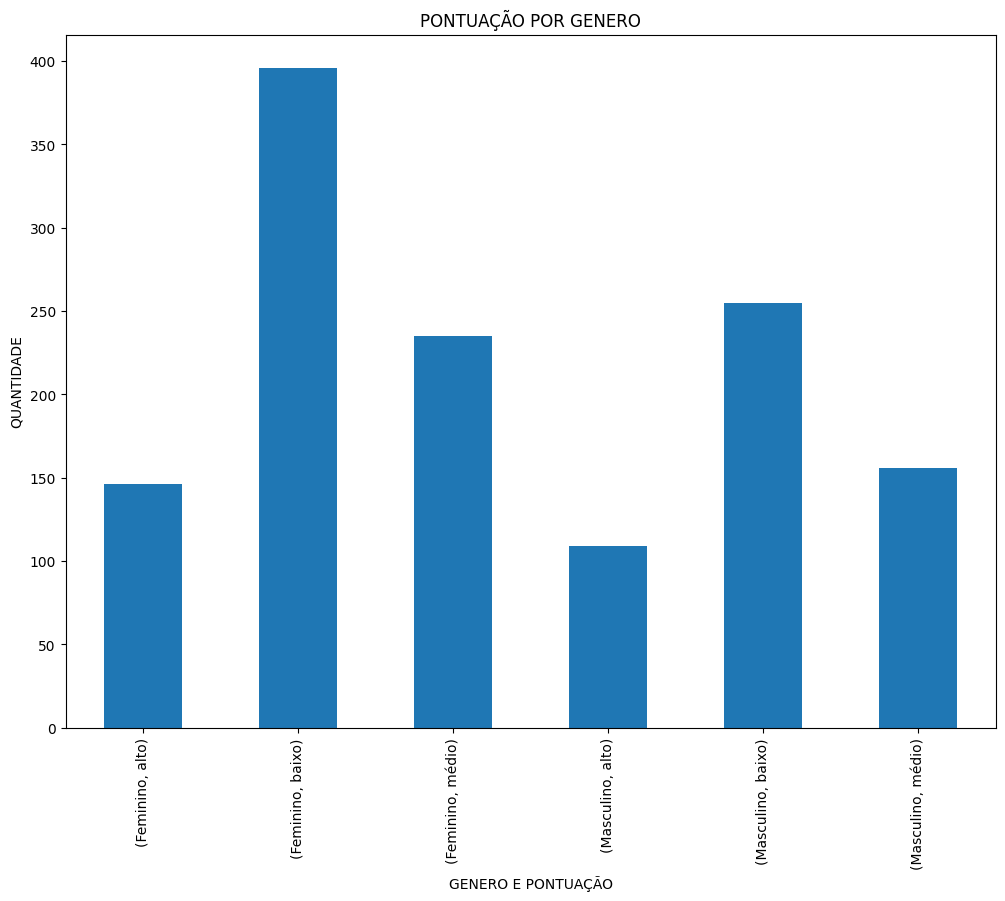

In [ ]:
df_analise.groupby(['genero', 'classificacao_pont']).size().plot.bar(figsize=(12,9),xlabel='GENERO E PONTUAÇÃO',ylabel='QUANTIDADE', title = 'PONTUAÇÃO POR GENERO' )

<Axes: title={'center': 'PROFISSÃO POR GENERO'}, xlabel='GENERO E PROFISSÃO', ylabel='QUANTIDADE'>

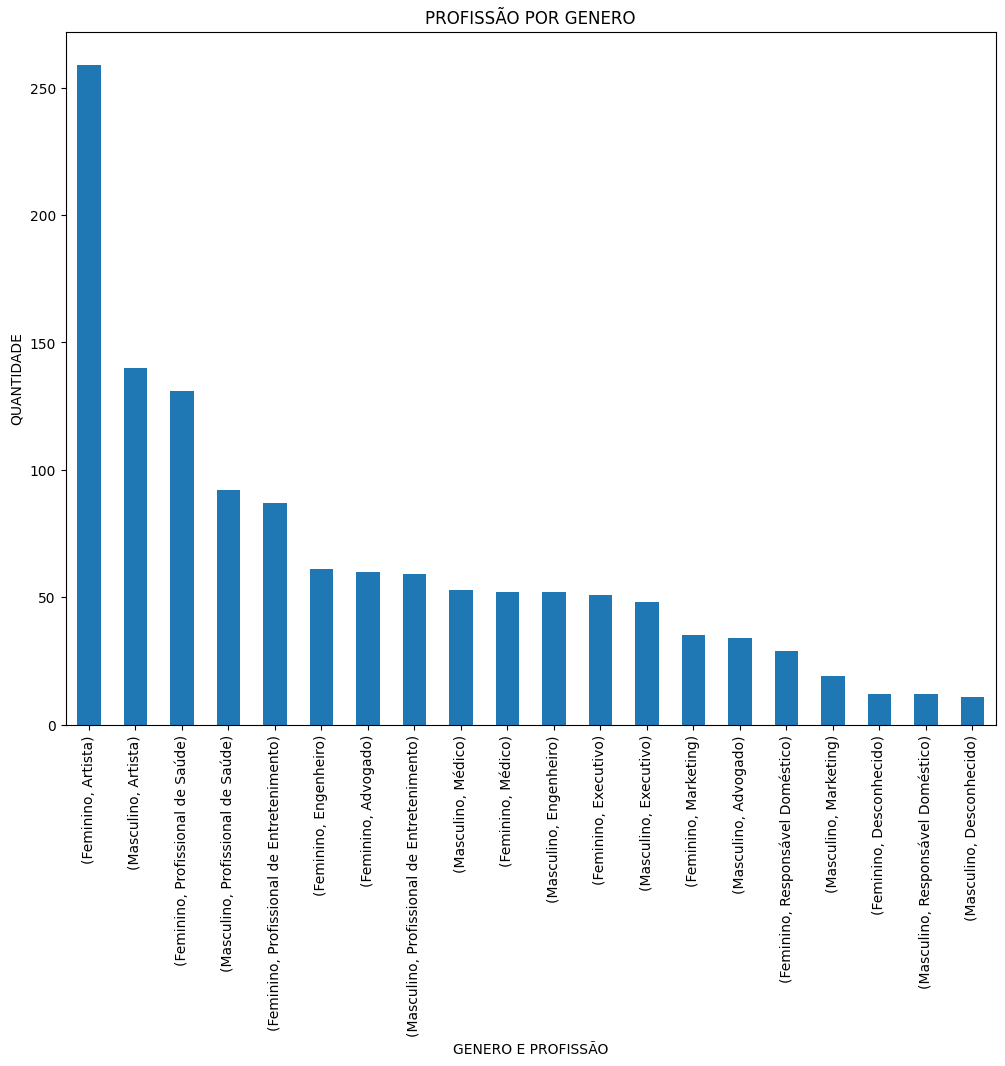

In [ ]:
df_analise.groupby(['genero', 'profissao']).size().sort_values(ascending=False).plot.bar(figsize=(12,9),xlabel='GENERO E PROFISSÃO',ylabel='QUANTIDADE', title = 'PROFISSÃO POR GENERO' )

Link para o Dashboard - Looker Studio: https://lookerstudio.google.com/reporting/11514415-7534-43c6-af23-ee10b9bf2639
